In [1]:
import requests

url = "https://accounts.spotify.com/api/token"
headers = {
    "Content-Type": "application/x-www-form-urlencoded"
}
data = {
    "grant_type": "client_credentials",
    "client_id": "b21ac59f5df942e9a55363944234c5da",
    "client_secret": "7d57d56deeb44c44a3c1f3b3786ce9e1"
}

response = requests.post(url, headers=headers, data=data)

# Print the response
print(response.status_code)
print(response.json())


200
{'access_token': 'BQDXLutfVx6uSHPXDAZiQjiIPG09qCI53KxjH0dtBceWMrRLuPiJNAB7RIYXiqGFsB2UGmtIlD0AzoDiFDG3AHPfKjb8ImS_C7aRki9UqK84Rim2f7c', 'token_type': 'Bearer', 'expires_in': 3600}


In [2]:
token = response.json()
token = token['access_token']
token = 'Bearer ' + token
token

'Bearer BQDXLutfVx6uSHPXDAZiQjiIPG09qCI53KxjH0dtBceWMrRLuPiJNAB7RIYXiqGFsB2UGmtIlD0AzoDiFDG3AHPfKjb8ImS_C7aRki9UqK84Rim2f7c'

In [3]:
import requests

url = "https://api.spotify.com/v1/tracks/11dFghVXANMlKmJXsNCbNl"
headers = {
    "Authorization": token
}

response = requests.get(url, headers=headers)

# Print the response
print(response.status_code)
print(response.json())


200
{'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6sFIWsNpZYqfjUpaCgueju'}, 'href': 'https://api.spotify.com/v1/artists/6sFIWsNpZYqfjUpaCgueju', 'id': '6sFIWsNpZYqfjUpaCgueju', 'name': 'Carly Rae Jepsen', 'type': 'artist', 'uri': 'spotify:artist:6sFIWsNpZYqfjUpaCgueju'}], 'available_markets': [], 'external_urls': {'spotify': 'https://open.spotify.com/album/0tGPJ0bkWOUmH7MEOR77qc'}, 'href': 'https://api.spotify.com/v1/albums/0tGPJ0bkWOUmH7MEOR77qc', 'id': '0tGPJ0bkWOUmH7MEOR77qc', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b2737359994525d219f64872d3b1', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e027359994525d219f64872d3b1', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d000048517359994525d219f64872d3b1', 'width': 64}], 'name': 'Cut To The Feeling', 'release_date': '2017-05-26', 'release_date_precision': 'day', 'total_tracks': 1, 'type': 'al

### API Request

In [4]:
url = "https://api.spotify.com/v1/playlists/2Jxf2YUAkK5WdJxopgmYws"
headers = {
    "Authorization": token
}

response = requests.get(url, headers=headers)

params = {
    "limit": 20  # Limit the number of tracks returned to 100
}

# Print the response
print(response.status_code)
print(response.json())

200
{'collaborative': False, 'description': '', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/2Jxf2YUAkK5WdJxopgmYws'}, 'followers': {'href': None, 'total': 2}, 'href': 'https://api.spotify.com/v1/playlists/2Jxf2YUAkK5WdJxopgmYws', 'id': '2Jxf2YUAkK5WdJxopgmYws', 'images': [{'height': None, 'url': 'https://image-cdn-ak.spotifycdn.com/image/ab67706c0000da84a07346f0297ac27e4ce5c093', 'width': None}], 'name': 'Out of the box', 'owner': {'display_name': 'Ronaldo Jesús Álvarez', 'external_urls': {'spotify': 'https://open.spotify.com/user/2kb86jp0dgz8cnhxri0n8g8zs'}, 'href': 'https://api.spotify.com/v1/users/2kb86jp0dgz8cnhxri0n8g8zs', 'id': '2kb86jp0dgz8cnhxri0n8g8zs', 'type': 'user', 'uri': 'spotify:user:2kb86jp0dgz8cnhxri0n8g8zs'}, 'primary_color': None, 'public': True, 'snapshot_id': 'AAAFURWWpHYnSQlYkkRQHHTVWL1F0zTL', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/2Jxf2YUAkK5WdJxopgmYws/tracks?offset=0&limit=100', 'items': [{'added_at': '2018-12-30T05:41:08Z'

### Data transformation

In [5]:
import json
import pandas as pd
playlist_data = response.json()
tracks = playlist_data['tracks']['items']

# Extract key information from the tracks
track_info = []
for item in tracks:
    track = item['track']
    track_info.append({
        'added_at': item['added_at'],
        'track_name': track['name'],
        'artist': track['artists'][0]['name'],
        'album': track['album']['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms'],
        'spotify_url': track['external_urls']['spotify']
    })

# Create a DataFrame
df_tracks = pd.DataFrame(track_info)

df_tracks

,added_at,track_name,artist,album,popularity,duration_ms,spotify_url
0,2018-12-30T05:41:08Z,Hotel California - 2013 Remaster,Eagles,Hotel California (2013 Remaster),84,391376,https://open.spotify.com/track/40riOy7x9W7GXjy...
1,2018-12-30T05:54:36Z,Highway to Hell,AC/DC,Highway to Hell,87,208400,https://open.spotify.com/track/2zYzyRzz6pRmhPz...
2,2018-12-30T06:01:59Z,Dream On,Aerosmith,Aerosmith,7,266960,https://open.spotify.com/track/5MxNLUsfh7uzROy...
3,2018-12-30T15:19:56Z,No Roots,Alice Merton,No Roots,53,235813,https://open.spotify.com/track/4CdfFYzaAJ0y0be...
4,2018-12-30T15:21:46Z,Sweet Emotion,The Kooks,Listen,56,308569,https://open.spotify.com/track/0hIGUS1PQbv5NIr...
...,...,...,...,...,...,...,...
95,2019-03-16T16:41:39Z,"See You Later, Alligator",Bill Haley & His Comets,Bill Haley's Greatest Hits,44,165360,https://open.spotify.com/track/1s4hyUFWmLWiAam...
96,2019-03-16T16:44:38Z,Te Voy a Enseñar a Querer,Manoella Torres,La Gran Colección del 60 Aniversario CBS - Man...,53,196200,https://open.spotify.com/track/1611GmlolwbEqZg...
97,2019-03-17T01:40:57Z,Back In Black,AC/DC,Back In Black,85,255493,https://open.spotify.com/track/08mG3Y1vljYA6bv...
98,2019-03-18T06:18:55Z,We Are Young (feat. Janelle Monáe),fun.,Some Nights,78,250626,https://open.spotify.com/track/5rgy6ghBq1eRApC...


### Data Preparation

In [6]:
df_tracks['added_at'] = pd.to_datetime(df_tracks['added_at'])
df_tracks['duration_min'] = df_tracks['duration_ms']/60000
df_tracks.drop(columns=['duration_ms'], inplace=True)
df_tracks

,added_at,track_name,artist,album,popularity,spotify_url,duration_min
0,2018-12-30 05:41:08+00:00,Hotel California - 2013 Remaster,Eagles,Hotel California (2013 Remaster),84,https://open.spotify.com/track/40riOy7x9W7GXjy...,6.522933
1,2018-12-30 05:54:36+00:00,Highway to Hell,AC/DC,Highway to Hell,87,https://open.spotify.com/track/2zYzyRzz6pRmhPz...,3.473333
2,2018-12-30 06:01:59+00:00,Dream On,Aerosmith,Aerosmith,7,https://open.spotify.com/track/5MxNLUsfh7uzROy...,4.449333
3,2018-12-30 15:19:56+00:00,No Roots,Alice Merton,No Roots,53,https://open.spotify.com/track/4CdfFYzaAJ0y0be...,3.930217
4,2018-12-30 15:21:46+00:00,Sweet Emotion,The Kooks,Listen,56,https://open.spotify.com/track/0hIGUS1PQbv5NIr...,5.142817
...,...,...,...,...,...,...,...
95,2019-03-16 16:41:39+00:00,"See You Later, Alligator",Bill Haley & His Comets,Bill Haley's Greatest Hits,44,https://open.spotify.com/track/1s4hyUFWmLWiAam...,2.756000
96,2019-03-16 16:44:38+00:00,Te Voy a Enseñar a Querer,Manoella Torres,La Gran Colección del 60 Aniversario CBS - Man...,53,https://open.spotify.com/track/1611GmlolwbEqZg...,3.270000
97,2019-03-17 01:40:57+00:00,Back In Black,AC/DC,Back In Black,85,https://open.spotify.com/track/08mG3Y1vljYA6bv...,4.258217
98,2019-03-18 06:18:55+00:00,We Are Young (feat. Janelle Monáe),fun.,Some Nights,78,https://open.spotify.com/track/5rgy6ghBq1eRApC...,4.177100


In [7]:
print(df_tracks.head())

                   added_at                        track_name        artist  \
0 2018-12-30 05:41:08+00:00  Hotel California - 2013 Remaster        Eagles   
1 2018-12-30 05:54:36+00:00                   Highway to Hell         AC/DC   
2 2018-12-30 06:01:59+00:00                          Dream On     Aerosmith   
3 2018-12-30 15:19:56+00:00                          No Roots  Alice Merton   
4 2018-12-30 15:21:46+00:00                     Sweet Emotion     The Kooks   

                              album  popularity  \
0  Hotel California (2013 Remaster)          84   
1                   Highway to Hell          87   
2                         Aerosmith           7   
3                          No Roots          53   
4                            Listen          56   

                                         spotify_url  duration_min  
0  https://open.spotify.com/track/40riOy7x9W7GXjy...      6.522933  
1  https://open.spotify.com/track/2zYzyRzz6pRmhPz...      3.473333  
2  https://

In [8]:
# Data Analysis
print(df_tracks.describe())

       popularity  duration_min
count  100.000000    100.000000
mean    43.430000      3.604828
std     29.387435      0.925585
min      0.000000      1.595200
25%      6.250000      3.144342
50%     53.000000      3.485842
75%     66.250000      3.981212
max     88.000000      7.056000


In [9]:
most_popular_track = df_tracks.loc[df_tracks['popularity'].idxmax()]
print("Most popular track:", most_popular_track)

Most popular track: added_at                                2019-01-07 00:17:19+00:00
track_name                                             Without Me
artist                                                     Eminem
album                                             The Eminem Show
popularity                                                     88
spotify_url     https://open.spotify.com/track/7lQ8MOhq6IN2w8E...
duration_min                                             4.838667
Name: 35, dtype: object


In [10]:
least_popular_track = df_tracks.loc[df_tracks['popularity'].idxmin()]
print("Least popular track:", least_popular_track)

Least popular track: added_at                                2019-01-04 04:31:31+00:00
track_name                                              Crab Rave
artist                                                 Noisestorm
album                                                   Crab Rave
popularity                                                      0
spotify_url     https://open.spotify.com/track/7As0vadLc9vx7rP...
duration_min                                                2.688
Name: 22, dtype: object


### Data Visualization

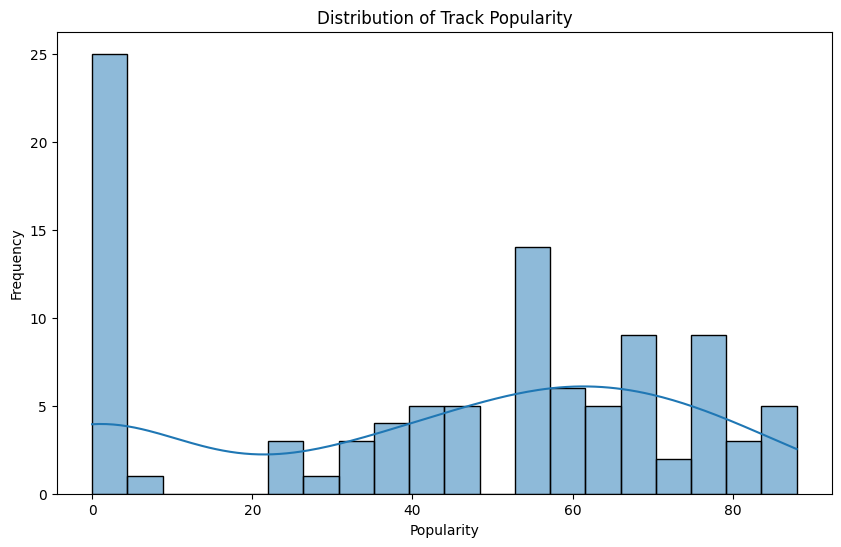

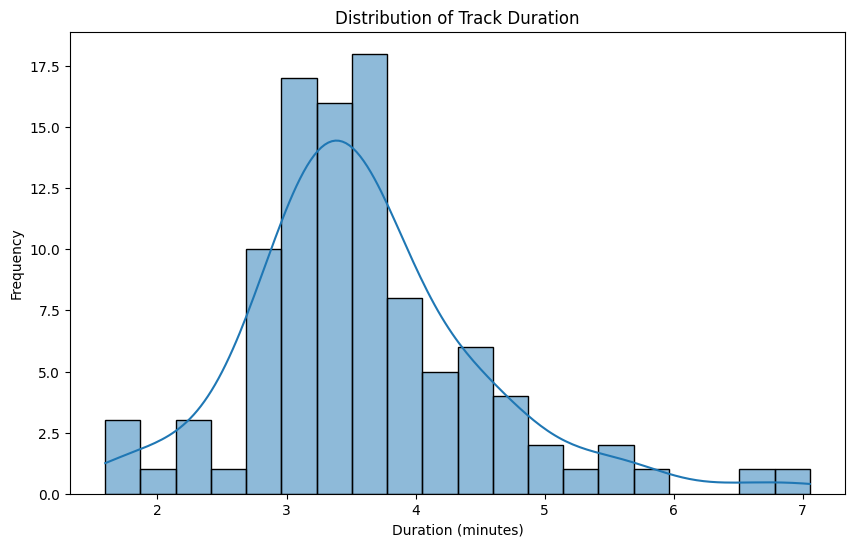

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df_tracks['popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_tracks['duration_min'], bins=20, kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

### Now for the interesting part, it's time to start analyzing our track features

In [12]:
#Let's just use our track ids to call the API
df_tracks['spotify_url']

0     https://open.spotify.com/track/40riOy7x9W7GXjy...
1     https://open.spotify.com/track/2zYzyRzz6pRmhPz...
2     https://open.spotify.com/track/5MxNLUsfh7uzROy...
3     https://open.spotify.com/track/4CdfFYzaAJ0y0be...
4     https://open.spotify.com/track/0hIGUS1PQbv5NIr...
                            ...                        
95    https://open.spotify.com/track/1s4hyUFWmLWiAam...
96    https://open.spotify.com/track/1611GmlolwbEqZg...
97    https://open.spotify.com/track/08mG3Y1vljYA6bv...
98    https://open.spotify.com/track/5rgy6ghBq1eRApC...
99    https://open.spotify.com/track/5masKPHeAOVNgxd...
Name: spotify_url, Length: 100, dtype: object

In [13]:
#We are splitting our url to get the last string after /
track_ids = []
for track_id in df_tracks['spotify_url'].apply(lambda x: x.split('/')[-1]):
    track_ids.append(track_id)

track_ids_shortened = track_ids[:50]

In [14]:
track_ids_string= ','.join(track_ids_shortened)
track_ids_string

'40riOy7x9W7GXjyGp4pjAv,2zYzyRzz6pRmhPzyfMEC8s,5MxNLUsfh7uzROypsoO5qe,4CdfFYzaAJ0y0beKzmgJSn,0hIGUS1PQbv5NIrHIf6Fza,6Sf2YqGzNmVfSNpLFWuYbz,66U0ASk1VHZsqIkpMjKX3B,5OYUtKjALXnNjXRwTVStCK,3lomd0j6m22YDaHgc4aKXQ,5lWSa1rmuSL6OBPOnkAqoa,5YEBDtfU1CkrYUCJtjRmaa,1xjWiOCXBADVo6NUfbPgGR,64xEklgo1a1J0frGNUXNTO,7lQWRAjyhTpCWFC0jmclT4,0q97eZcYkeHy2buhS1O5Ir,2gsNpSn7VvvJuSrIDfRoYy,11rsK9GDZ9UdWsxtDqnMmN,5t6GyhawtK5itjpDdvGGx0,41JBXtssxYuLMyiBwwlnY6,38sK8PSXXgZMLZujwgvNUH,1oaPnvUccVzyjsKFkuE7oA,2xZfPZxInlDXDKc6NDts8Z,7As0vadLc9vx7rP3F2XCQY,2vClCBvGKJOxhhtw71Dobw,4zQuwW24dweWcaX0fEJkP2,5KgxblRxvdRJXI19O2AIY0,418lMEaG5X3bgBYYVzIigz,1kJtfldK9F7XmsSiSNlbth,5jr6pG3khBcBXZRm8NogSe,4qRaZYiaOsSvWC7VgcxrI0,1GCbc1vpkZA2zhjsSFhmHT,6E7oFW7xTK6Ghucsq6tMUj,2lfHSbXbQsHyldZZWSpL37,4hTU2IWMbGpvYp0Rpdpw1j,1kIzP7gSA088qOrCxRoWpV,7lQ8MOhq6IN2w8EYcFNSUk,4xkOaSrkexMciUUogZKVTS,65OXGbKBQ8gUyJvUd0jNpf,3zO9BNjgrAOzoQM6wKNcIm,361ePlL30dZ240c84R06AG,4hHbeIIKO5Y5uLyIEbY9Gn,1iZgzgmsFsi0deffe0rleB,76Zi40dd2HoTn3sehttJhY,6ZcL1hCAnE

In [15]:
url = "https://api.spotify.com/v1/tracks/"
headers = {
    "Authorization": token
}

params = {
    "ids": track_ids_string
}


response = requests.get(url, headers=headers, params= params)


# Print the response
print(response.status_code)
print(response.json())

200
{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0ECwFtbIWEVNwjlrfc6xoL'}, 'href': 'https://api.spotify.com/v1/artists/0ECwFtbIWEVNwjlrfc6xoL', 'id': '0ECwFtbIWEVNwjlrfc6xoL', 'name': 'Eagles', 'type': 'artist', 'uri': 'spotify:artist:0ECwFtbIWEVNwjlrfc6xoL'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'BY', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BW', 'BF', 'CV', 'CW', 'DM'

In [16]:
tracks_data = response.json()
tracks_data = tracks_data['tracks'] 
tracks_data

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0ECwFtbIWEVNwjlrfc6xoL'},
     'href': 'https://api.spotify.com/v1/artists/0ECwFtbIWEVNwjlrfc6xoL',
     'id': '0ECwFtbIWEVNwjlrfc6xoL',
     'name': 'Eagles',
     'type': 'artist',
     'uri': 'spotify:artist:0ECwFtbIWEVNwjlrfc6xoL'}],
   'available_markets': ['AR',
    'AU',
    'AT',
    'BE',
    'BO',
    'BR',
    'BG',
    'CA',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DK',
    'DO',
    'DE',
    'EC',
    'EE',
    'SV',
    'FI',
    'FR',
    'GR',
    'GT',
    'HN',
    'HK',
    'HU',
    'IS',
    'IE',
    'IT',
    'LV',
    'LT',
    'LU',
    'MY',
    'MT',
    'MX',
    'NL',
    'NZ',
    'NI',
    'NO',
    'PA',
    'PY',
    'PE',
    'PH',
    'PL',
    'PT',
    'SG',
    'SK',
    'ES',
    'SE',
    'CH',
    'TW',
    'TR',
    'UY',
    'US',
    'GB',
    'AD',
    'LI',
    'MC',
    'ID',
    'JP',
    'TH',
    'VN',
    'RO'

In [17]:
url = "https://api.spotify.com/v1/audio-features/"
headers = {
    "Authorization": token
}

params = {
    "ids": track_ids_string
}


response = requests.get(url, headers=headers, params= params)


# Print the response
print(response.status_code)
print(response.json())

200
{'audio_features': [{'danceability': 0.579, 'energy': 0.508, 'key': 2, 'loudness': -9.484, 'mode': 1, 'speechiness': 0.027, 'acousticness': 0.00574, 'instrumentalness': 0.000494, 'liveness': 0.0575, 'valence': 0.609, 'tempo': 147.125, 'type': 'audio_features', 'id': '40riOy7x9W7GXjyGp4pjAv', 'uri': 'spotify:track:40riOy7x9W7GXjyGp4pjAv', 'track_href': 'https://api.spotify.com/v1/tracks/40riOy7x9W7GXjyGp4pjAv', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/40riOy7x9W7GXjyGp4pjAv', 'duration_ms': 391376, 'time_signature': 4}, {'danceability': 0.574, 'energy': 0.913, 'key': 6, 'loudness': -4.793, 'mode': 0, 'speechiness': 0.133, 'acousticness': 0.061, 'instrumentalness': 0.00158, 'liveness': 0.156, 'valence': 0.423, 'tempo': 115.728, 'type': 'audio_features', 'id': '2zYzyRzz6pRmhPzyfMEC8s', 'uri': 'spotify:track:2zYzyRzz6pRmhPzyfMEC8s', 'track_href': 'https://api.spotify.com/v1/tracks/2zYzyRzz6pRmhPzyfMEC8s', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2zYz

In [18]:
tracks_data_features = response.json()
tracks_data_features = tracks_data_features['audio_features'] 
tracks_data_features

[{'danceability': 0.579,
  'energy': 0.508,
  'key': 2,
  'loudness': -9.484,
  'mode': 1,
  'speechiness': 0.027,
  'acousticness': 0.00574,
  'instrumentalness': 0.000494,
  'liveness': 0.0575,
  'valence': 0.609,
  'tempo': 147.125,
  'type': 'audio_features',
  'id': '40riOy7x9W7GXjyGp4pjAv',
  'uri': 'spotify:track:40riOy7x9W7GXjyGp4pjAv',
  'track_href': 'https://api.spotify.com/v1/tracks/40riOy7x9W7GXjyGp4pjAv',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/40riOy7x9W7GXjyGp4pjAv',
  'duration_ms': 391376,
  'time_signature': 4},
 {'danceability': 0.574,
  'energy': 0.913,
  'key': 6,
  'loudness': -4.793,
  'mode': 0,
  'speechiness': 0.133,
  'acousticness': 0.061,
  'instrumentalness': 0.00158,
  'liveness': 0.156,
  'valence': 0.423,
  'tempo': 115.728,
  'type': 'audio_features',
  'id': '2zYzyRzz6pRmhPzyfMEC8s',
  'uri': 'spotify:track:2zYzyRzz6pRmhPzyfMEC8s',
  'track_href': 'https://api.spotify.com/v1/tracks/2zYzyRzz6pRmhPzyfMEC8s',
  'analysis_url': 'http

In [19]:
tracks_data_features

[{'danceability': 0.579,
  'energy': 0.508,
  'key': 2,
  'loudness': -9.484,
  'mode': 1,
  'speechiness': 0.027,
  'acousticness': 0.00574,
  'instrumentalness': 0.000494,
  'liveness': 0.0575,
  'valence': 0.609,
  'tempo': 147.125,
  'type': 'audio_features',
  'id': '40riOy7x9W7GXjyGp4pjAv',
  'uri': 'spotify:track:40riOy7x9W7GXjyGp4pjAv',
  'track_href': 'https://api.spotify.com/v1/tracks/40riOy7x9W7GXjyGp4pjAv',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/40riOy7x9W7GXjyGp4pjAv',
  'duration_ms': 391376,
  'time_signature': 4},
 {'danceability': 0.574,
  'energy': 0.913,
  'key': 6,
  'loudness': -4.793,
  'mode': 0,
  'speechiness': 0.133,
  'acousticness': 0.061,
  'instrumentalness': 0.00158,
  'liveness': 0.156,
  'valence': 0.423,
  'tempo': 115.728,
  'type': 'audio_features',
  'id': '2zYzyRzz6pRmhPzyfMEC8s',
  'uri': 'spotify:track:2zYzyRzz6pRmhPzyfMEC8s',
  'track_href': 'https://api.spotify.com/v1/tracks/2zYzyRzz6pRmhPzyfMEC8s',
  'analysis_url': 'http

In [20]:
df_audiofeatures = pd.DataFrame(tracks_data_features)
df_tracksinfo = pd.DataFrame(tracks_data)

In [21]:
df_audio = pd.merge(df_audiofeatures, df_tracksinfo, on='id', how='inner')
df_audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_ids,external_urls,href,is_local,name,popularity,preview_url,track_number,type_y,uri_y
0,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,...,{'isrc': 'USEE11300353'},{'spotify': 'https://open.spotify.com/track/40...,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,False,Hotel California - 2013 Remaster,84,https://p.scdn.co/mp3-preview/6fedc11d0f55bef1...,1,track,spotify:track:40riOy7x9W7GXjyGp4pjAv
1,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.1560,0.423,...,{'isrc': 'AUAP07900028'},{'spotify': 'https://open.spotify.com/track/2z...,https://api.spotify.com/v1/tracks/2zYzyRzz6pRm...,False,Highway to Hell,87,https://p.scdn.co/mp3-preview/e5dde93998c6b622...,1,track,spotify:track:2zYzyRzz6pRmhPzyfMEC8s
2,0.307,0.433,1,-10.057,1,0.0290,0.38800,0.000091,0.3320,0.224,...,{'isrc': 'USSM10011897'},{'spotify': 'https://open.spotify.com/track/5M...,https://api.spotify.com/v1/tracks/5MxNLUsfh7uz...,False,Dream On,7,None,3,track,spotify:track:5MxNLUsfh7uzROypsoO5qe
3,0.863,0.657,7,-7.295,1,0.1050,0.26400,0.006190,0.0713,0.829,...,{'isrc': 'DEVQ71600001'},{'spotify': 'https://open.spotify.com/track/4C...,https://api.spotify.com/v1/tracks/4CdfFYzaAJ0y...,False,No Roots,53,https://p.scdn.co/mp3-preview/7a2b44ba28afe507...,1,track,spotify:track:4CdfFYzaAJ0y0beKzmgJSn
4,0.764,0.829,1,-5.261,1,0.0711,0.04590,0.000184,0.1040,0.606,...,{'isrc': 'GBUM71401814'},{'spotify': 'https://open.spotify.com/track/0h...,https://api.spotify.com/v1/tracks/0hIGUS1PQbv5...,False,Sweet Emotion,56,None,11,track,spotify:track:0hIGUS1PQbv5NIrHIf6Fza


In [22]:
df_audio.isnull().sum()

danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
type_x                0
id                    0
uri_x                 0
track_href            0
analysis_url          0
duration_ms_x         0
time_signature        0
album                 0
artists               0
available_markets     0
disc_number           0
duration_ms_y         0
explicit              0
external_ids          0
external_urls         0
href                  0
is_local              0
name                  0
popularity            0
preview_url          22
track_number          0
type_y                0
uri_y                 0
dtype: int64

In [23]:
df_audio_c = df_audio.drop(['external_ids', 'external_urls', 'href', 'preview_url', 'track_number', 'artists', 'album', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x', 'duration_ms_y', 'disc_number', 'available_markets', 'type_y', 'type_x', 'uri_y', 'time_signature', 'is_local'], axis= 1)
df_audio_c.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,explicit,name,popularity
0,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,40riOy7x9W7GXjyGp4pjAv,False,Hotel California - 2013 Remaster,84
1,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.1560,0.423,115.728,2zYzyRzz6pRmhPzyfMEC8s,False,Highway to Hell,87
2,0.307,0.433,1,-10.057,1,0.0290,0.38800,0.000091,0.3320,0.224,160.900,5MxNLUsfh7uzROypsoO5qe,False,Dream On,7
3,0.863,0.657,7,-7.295,1,0.1050,0.26400,0.006190,0.0713,0.829,115.958,4CdfFYzaAJ0y0beKzmgJSn,False,No Roots,53
4,0.764,0.829,1,-5.261,1,0.0711,0.04590,0.000184,0.1040,0.606,98.020,0hIGUS1PQbv5NIrHIf6Fza,False,Sweet Emotion,56


### Preparing the variables that we will use to recommend songs

In [24]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_audio_c[features]
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125
1,0.574,0.913,6,-4.793,0,0.1330,0.06100,0.001580,0.1560,0.423,115.728
2,0.307,0.433,1,-10.057,1,0.0290,0.38800,0.000091,0.3320,0.224,160.900
3,0.863,0.657,7,-7.295,1,0.1050,0.26400,0.006190,0.0713,0.829,115.958
4,0.764,0.829,1,-5.261,1,0.0711,0.04590,0.000184,0.1040,0.606,98.020


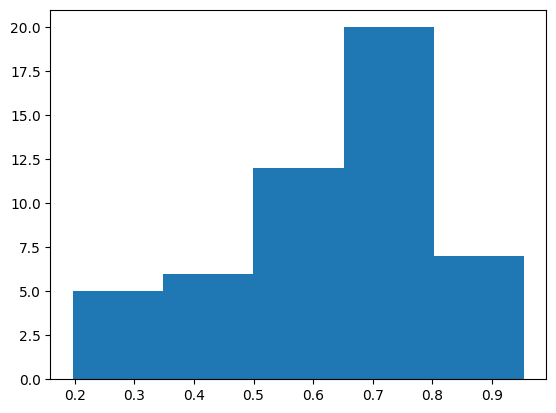

In [25]:
plt.hist(X['danceability'], 5)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Correlation between songs using scaled values

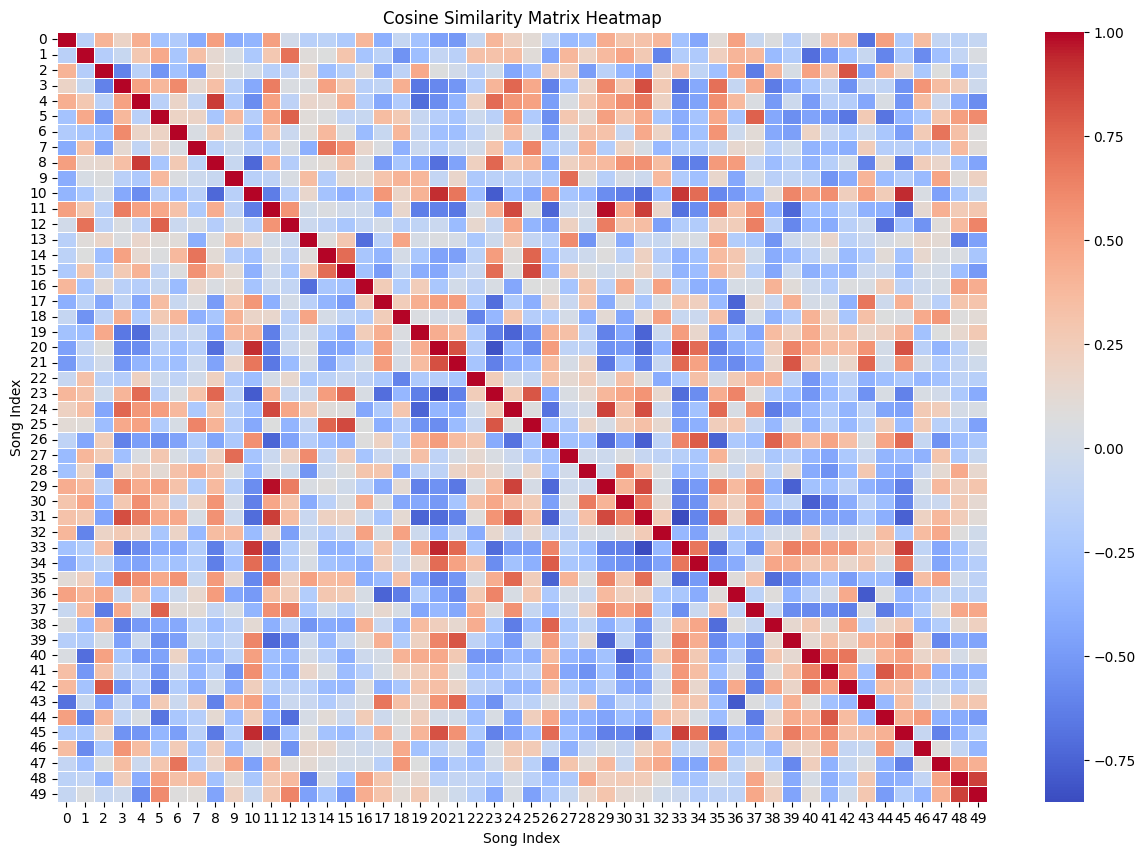

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(X_scaled)
# Assuming similarity_matrix is already computed
plt.figure(figsize=(15, 10))
sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Cosine Similarity Matrix Heatmap')
plt.xlabel('Song Index')
plt.ylabel('Song Index')
plt.show()

### Let's use songs with index 48 and 49 to compare them and see if they are actually correleated to one another

In [28]:
print(df_audio_c.loc[49])
print(df_audio_c.loc[48])


danceability                          0.559
energy                                0.553
key                                       9
loudness                             -5.289
mode                                      0
speechiness                          0.0375
acousticness                          0.555
instrumentalness                   0.000001
liveness                              0.138
valence                               0.822
tempo                               169.995
id                   5BaDvD4VYk48bVskuzQjwI
explicit                              False
name                Hola Mi Amor (Mariachi)
popularity                               27
Name: 49, dtype: object
danceability                          0.77
energy                               0.521
key                                      8
loudness                            -3.561
mode                                     0
speechiness                          0.086
acousticness                         0.738
instrumentalnes

### We are going to take these values and tranpose them for better plotting understanding

In [29]:
df_comparison = df_audio_c.loc[48:49, features]
df_comparison = df_comparison.T
df_comparison.columns = ['Para Que Regreses', 'Hola Mi Amor (Mariachi)']
df_comparison

,Para Que Regreses,Hola Mi Amor (Mariachi)
danceability,0.770000,0.559000
energy,0.521000,0.553000
key,8.000000,9.000000
loudness,-3.561000,-5.289000
mode,0.000000,0.000000
speechiness,0.086000,0.037500
acousticness,0.738000,0.555000
instrumentalness,0.000276,0.000001
liveness,0.077600,0.138000
valence,0.952000,0.822000


### Let's graph down our songs using only the variables in _features_ list

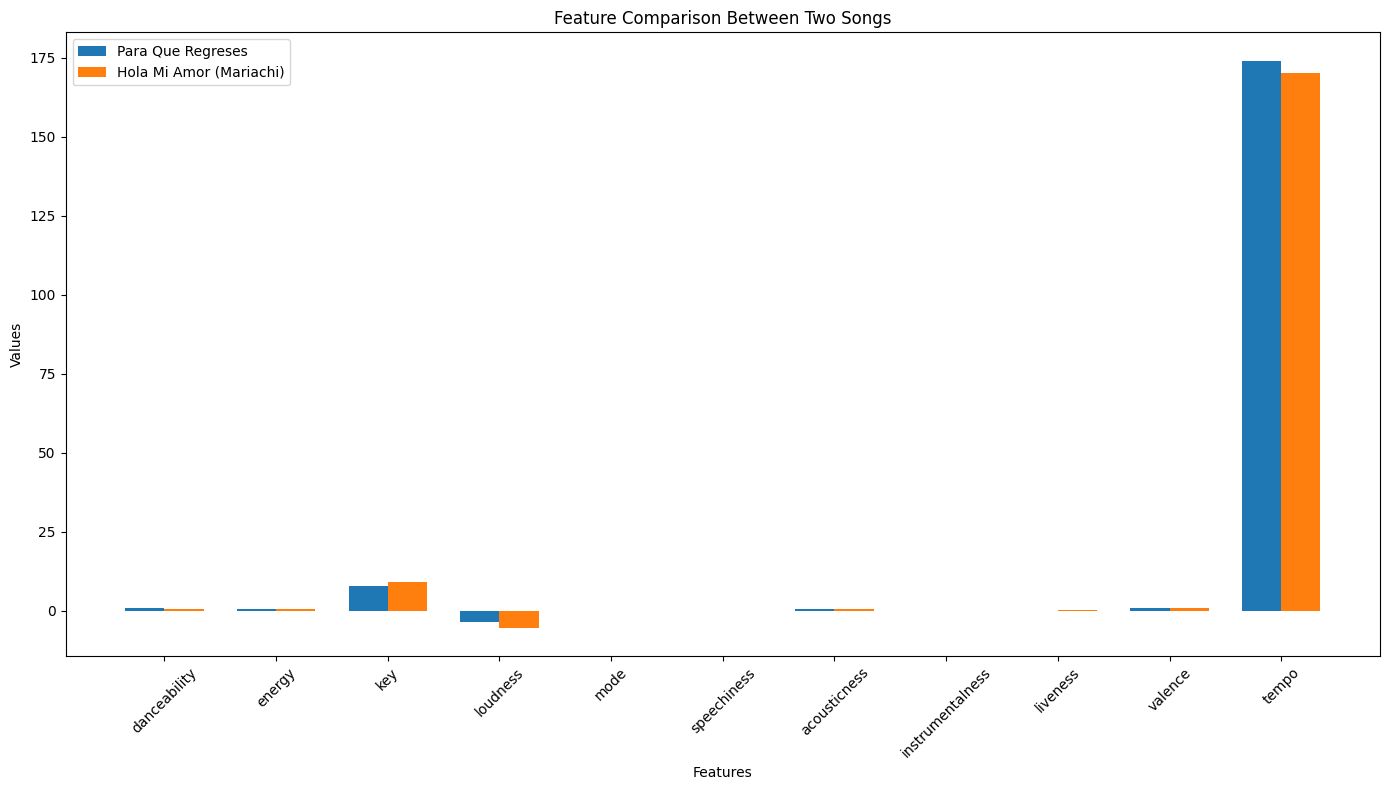

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Define the bar width
bar_width = 0.35

# Define the index for the bar positions
index = range(len(df_comparison))

# Plot the bars for each song
plt.bar(index, df_comparison.iloc[:, 0], bar_width, label=df_comparison.columns[0])
plt.bar([p + bar_width for p in index], df_comparison.iloc[:, 1], bar_width, label=df_comparison.columns[1])

# Add labels, title, and custom x-axis tick labels
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Feature Comparison Between Two Songs')
plt.xticks([p + bar_width / 2 for p in index], df_comparison.index, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### We already showed that our correlation matrix works perfectly, both of these songs have similar values, we will proceed with the next step

In [65]:
import numpy as np
a = [4,6]
similarity_scores = np.mean(similarity_matrix[a], axis=0)
similarity_scores

array([ 0.11854034,  0.01977608, -0.20149019,  0.5512506 ,  0.59084996,
        0.02428832,  0.59084996, -0.02948868,  0.58379994, -0.07704336,
       -0.42825527,  0.40822055, -0.08464437,  0.13366336,  0.25401071,
        0.23860439, -0.23777251, -0.24158842,  0.0994369 , -0.39764737,
       -0.42263584, -0.31970048,  0.04648587,  0.38835907,  0.46159028,
        0.26346464, -0.46632918,  0.04492634,  0.30682496,  0.37897292,
        0.25755136,  0.56483826,  0.19566646, -0.48500884, -0.36288915,
        0.57084356,  0.16418994,  0.08209848, -0.45732105, -0.25223853,
       -0.15193802, -0.1027514 , -0.1751972 , -0.24145517, -0.09392616,
       -0.50087675,  0.30658396,  0.32527919, -0.0342933 , -0.24419133])

In [72]:
import numpy as np

def recommend_songs(favorite_ids, df, similarity_matrix, num_recommendations=5):
    # Convert song IDs to indices in the DataFrame
    song_indices = [df.index[df['id'] == id].tolist()[0] for id in favorite_ids]
    print(song_indices)
    # Aggregate similarity scores for these songs
    similarity_scores = np.mean(similarity_matrix[song_indices], axis=0)
    print(similarity_scores)
    
    # Sort these scores and get top song indices
    sorted_indices = np.argsort(similarity_scores)[::-1]
    
    # Filter out the favorite song indices
    recommendations_indices = [i for i in sorted_indices if i not in song_indices][:num_recommendations]
    
    # Convert indices back to song names or IDs
    recommended_songs = df.iloc[recommendations_indices]['name'].tolist()
    
    return recommended_songs


In [73]:
# Example favorite song IDs
favorite_song_ids = ['0hIGUS1PQbv5NIrHIf6Fza','4CdfFYzaAJ0y0beKzmgJSn']

# Call the recommendation function
recommended_songs = recommend_songs(favorite_song_ids, df_audio_c, similarity_matrix)

print("Recommended Songs:")
for song in recommended_songs:
    print(song)


[4, 3]
[ 0.31052456  0.10538124 -0.37690876  0.74725592  0.74725592  0.11725341
  0.39484465  0.01818471  0.61420064 -0.17860353 -0.49228044  0.57854774
 -0.03699671  0.11228343  0.31696557  0.33895709 -0.15470656 -0.26047414
  0.12043527 -0.68251581 -0.57243299 -0.4378191   0.01619026  0.56449937
  0.64764145  0.48070648 -0.54620613 -0.11501663  0.23148034  0.52729938
  0.43540689  0.74936608  0.2351249  -0.63459358 -0.43730867  0.64377066
  0.14390098  0.25535402 -0.56916427 -0.25093217 -0.36299399 -0.12414886
 -0.35734363 -0.25177698 -0.03169031 -0.52737466  0.45157619  0.154847
 -0.08014222 -0.29679049]
Recommended Songs:
Emergency
You Know I'm No Good
Without Me
Grandpa's Groove
Love the Way You Move


In [40]:
df_audio_c

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,explicit,name,popularity
0,0.579,0.5080,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,40riOy7x9W7GXjyGp4pjAv,False,Hotel California - 2013 Remaster,84
1,0.574,0.9130,6,-4.793,0,0.1330,0.06100,0.001580,0.1560,0.423,115.728,2zYzyRzz6pRmhPzyfMEC8s,False,Highway to Hell,87
2,0.307,0.4330,1,-10.057,1,0.0290,0.38800,0.000091,0.3320,0.224,160.900,5MxNLUsfh7uzROypsoO5qe,False,Dream On,7
3,0.863,0.6570,7,-7.295,1,0.1050,0.26400,0.006190,0.0713,0.829,115.958,4CdfFYzaAJ0y0beKzmgJSn,False,No Roots,53
4,0.764,0.8290,1,-5.261,1,0.0711,0.04590,0.000184,0.1040,0.606,98.020,0hIGUS1PQbv5NIrHIf6Fza,False,Sweet Emotion,56
5,0.762,0.7240,11,-6.309,0,0.0624,0.13800,0.000077,0.1870,0.775,132.051,6Sf2YqGzNmVfSNpLFWuYbz,False,Rave in the Grave,56
6,0.890,0.6720,7,-5.532,1,0.0621,0.70700,0.000604,0.1770,0.598,126.036,66U0ASk1VHZsqIkpMjKX3B,False,Little Swing,57
7,0.773,0.6540,5,-7.796,0,0.2840,0.53000,0.000000,0.1090,0.607,128.989,5OYUtKjALXnNjXRwTVStCK,False,Llama In My Living Room,54
8,0.790,0.7890,0,-5.404,1,0.0579,0.15900,0.000022,0.1720,0.558,123.039,3lomd0j6m22YDaHgc4aKXQ,False,Grandpa's Groove,45
9,0.690,0.7520,6,-11.470,0,0.0455,0.46300,0.001020,0.5950,0.970,126.005,5lWSa1rmuSL6OBPOnkAqoa,False,Rasputin,69
